In [98]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [99]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [100]:
data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900
5,6,8.700,48.900,75.000,7.200
6,7,57.500,32.800,23.500,11.800
7,8,120.200,19.600,11.600,13.200
8,9,8.600,2.100,1.000,4.800
9,10,199.800,2.600,21.200,10.600


In [101]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [102]:
data.isnull().sum().sort_values(ascending=False).head()

Sales         0
Newspaper     0
Radio         0
TV            0
Unnamed: 0    0
dtype: int64

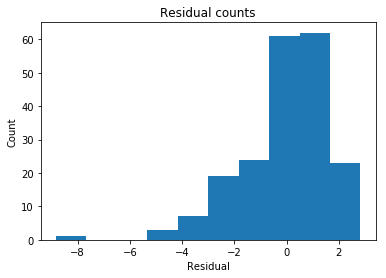

In [103]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [104]:
#looks like we might have an outlier to deal with. Let's find it. 

In [105]:
residual.describe()

count   200.000
mean     -0.000
std       1.673
min      -8.828
25%      -0.891
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

In [106]:
median = residual.loc[residual > 8].median()
residual = np.where(residual <-8, median, residual)

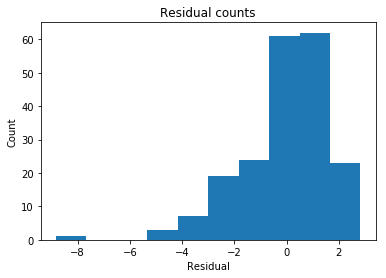

In [107]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [108]:
residual.describe()

count   200.000
mean     -0.000
std       1.673
min      -8.828
25%      -0.891
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

In [109]:
residual.mean()

-3.9968028886505636e-16

In [110]:
residual = residual.replace(residual.min(),residual.mean())

In [111]:
residual.describe()

count   200.000
mean      0.044
std       1.551
min      -5.278
25%      -0.851
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

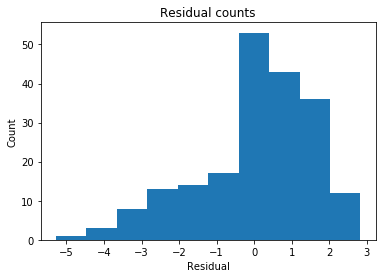

In [112]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [117]:
#replacing the outlier at the left end of the residual data with the mean helped. 

In [118]:
import scipy.stats as scipy

In [120]:
scipy.boxcox(residual)

ValueError: Data must be positive.

In [121]:
residual_sqr = residual * residual

In [122]:
scipy.boxcox(residual_sqr)

(array([ 0.98502759,  1.48619675,  2.67863709, -0.2022927 , -2.02127201,
         4.49309535, -3.47931169,  0.15036112,  0.14199114,  1.50300572,
         0.97264828, -3.05013433,  0.67662207, -0.26384969, -1.03467623,
         0.99196058, -1.86921279,  0.33174703,  0.62958946, -1.45096533,
        -3.17162797,  1.86009564, -0.23028322,  0.09051726,  0.95140303,
         3.22945495, -4.59618226,  0.28941933, -1.20014706,  0.64215837,
        -2.28558618, -1.06897928,  1.5162368 ,  0.81511508,  1.46971555,
         3.71853363,  1.55843216, -0.15705226, -2.52108243,  0.10303092,
        -2.34668722, -2.4937281 , -0.21594753,  0.12513196, -1.61600533,
        -2.14782313,  1.20191863,  0.83546506,  0.81410533,  0.91881514,
         0.43127351,  0.64904972,  1.48511997,  0.47304635, -2.62395453,
         2.05217309,  2.69807473, -1.48058825,  1.43936013, -2.12393835,
         1.99607338,  0.56486114,  0.16407393, -0.45441462,  0.04420798,
         0.79431353, -1.28415103,  0.65363354, -3.4

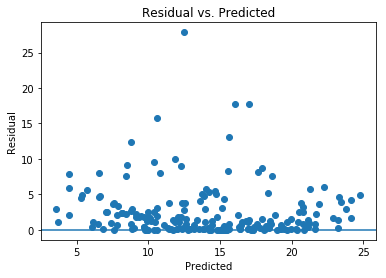

In [123]:
plt.scatter(predicted, residual_sqr)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

By removing the outlier value in X I was able to set the distribution to something more normal. Perhaps it could be made even more normal. And maybe it should be. I'm not sure based on the shape, how close to normal a distribution is supposed to be. I tried calculating the log, square, and inverse. Inverse was useless. But log and square gave me an error message stating that the max had to be greater than the min, which was confusing because it was. 

Performing a boxcox transformation on the residual data seems to ahve accounted for the curved appearance of the scatter in the text. Is that quadratic? At any rate, the transformation has also created more outliers. Has this solved one problem only to create another?